<a href="https://colab.research.google.com/github/AliTarek-1/Project-10.-Credit-Card-Fraud-Detection-using-Machine-Learning-in-Python-/blob/main/Project10_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder , StandardScaler

In [ ]:
data=pd.read_csv('/content/creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
174413,121903.0,1.990377,0.576967,-2.161558,1.565511,0.890954,-1.151209,0.744936,-0.405884,-0.025157,-0.389514,-0.079017,0.569739,0.468825,-1.134569,-0.440153,-0.372073,1.089314,-0.185707,-0.577174,-0.170303,-0.000921,0.226565,0.037975,0.986244,0.457002,-0.548521,0.003262,-0.015389,15.16,0.0
174414,121904.0,-0.178485,1.005425,0.189683,0.982715,1.276487,-0.912374,1.519071,-0.510492,-0.543448,0.218942,-0.966040,-0.017905,0.030964,0.228670,-0.312805,-1.309967,0.068171,-0.416709,0.766164,0.209820,0.083795,0.700306,-0.288574,-0.013359,0.024066,-0.403059,0.269842,0.025008,12.96,0.0
174415,121905.0,2.040762,-0.652335,-1.961113,-0.501931,0.700651,0.650734,-0.080058,-0.004127,-0.853303,0.741356,-0.386733,0.684175,0.985468,0.191156,0.142648,-3.046087,0.989856,-0.976481,-1.680827,-0.614022,-0.263335,-0.001320,0.212526,-0.297720,-0.051514,0.670807,-0.024880,-0.073672,28.00,0.0
174416,121905.0,0.127436,0.091596,0.735793,-1.298233,-0.494486,0.365601,0.529362,-0.372069,-0.603677,0.630545,-1.256623,0.078335,1.548800,-0.838109,0.090196,-1.283354,-0.558501,1.110429,-0.408670,-0.412307,-0.462415,-0.580971,0.342880,0.465106,-1.814987,0.074088,-0.095239,0.026431,100.00,0.0
174417,121905.0,1.643135,-0.708018,-2.137782,0.305304,0.270101,-0.188758,0.104842,0.033299,0.961903,-0.731766,0.614800,0.133841,-1.418452,-0.980077,-0.538974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174418 entries, 0 to 174417
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    174418 non-null  float64
 1   V1      174418 non-null  float64
 2   V2      174418 non-null  float64
 3   V3      174418 non-null  float64
 4   V4      174418 non-null  float64
 5   V5      174418 non-null  float64
 6   V6      174418 non-null  float64
 7   V7      174418 non-null  float64
 8   V8      174418 non-null  float64
 9   V9      174418 non-null  float64
 10  V10     174418 non-null  float64
 11  V11     174418 non-null  float64
 12  V12     174418 non-null  float64
 13  V13     174418 non-null  float64
 14  V14     174418 non-null  float64
 15  V15     174418 non-null  float64
 16  V16     174417 non-null  float64
 17  V17     174417 non-null  float64
 18  V18     174417 non-null  float64
 19  V19     174417 non-null  float64
 20  V20     174417 non-null  float64
 21  V21     17

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,174418.000000,174418.000000,174418.000000,174418.000000,174418.000000,174418.000000,174418.000000,174418.000000,174418.000000,174418.000000,174418.000000,174418.000000,174418.000000,174418.000000,174418.000000,174418.000000,174417.000000,174417.000000,174417.000000,174417.000000,174417.000000,174417.000000,174417.000000,174417.000000,174417.000000,174417.000000,174417.000000,174417.000000,174417.000000,174417.000000,174417.000000
mean,62309.128960,-0.160089,0.033801,0.467976,0.108257,-0.168597,0.056659,-0.077597,0.030286,0.017562,-0.026788,0.184052,-0.093896,0.061389,0.077230,0.125905,-0.005935,0.039993,-0.049759,-0.018083,0.029159,-0.026170,-0.078105,-0.021393,0.008374,0.087731,0.011644,0.002297,0.002355,87.661128,0.002070
std,28816.228452,1.862290,1.611586,1.396594,1.375546,1.348070,1.299025,1.212533,1.227053,1.149611,1.096094,1.046504,1.136408,1.046226,0.978040,0.949737,0.884388,0.910158,0.836277,0.813442,0.728806,0.742064,0.671017,0.590521,0.599656,0.468813,0.490175,0.392214,0.306982,246.376800,0.045448
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-22.838548,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,41576.000000,-0.982993,-0.547432,-0.099398,-0.755413,-0.824215,-0.693705,-0.585956,-0.165312,-0.660238,-0.518399,-0.571333,-0.506283,-0.628721,-0.340885,-0.458503,-0.471004,-0.420480,-0.524963,-0.496342,-0.184873,-0.230094,-0.545300,-0.169842,-0.333755,-0.202627,-0.330559,-0.065244,-0.030006,5.490000,0.000000
50%,61581.000000,-0.167266,0.103971,0.606110,0.114749,-0.219636,-0.205162,-0.030075,0.054366,-0.078793,-0.109576,0.113268,0.110439,0.029579,0.090188,0.233953,0.064645,-0.020050,-0.050923,-0.020008,-0.037069,-0.052796,-0.062028,-0.035103,0.058665,0.131231,-0.059333,0.008308,0.020809,22.000000,0.000000
75%,79436.000000,1.188791,0.799261,1.287774,0.928659,0.386359,0.447315,0.466925,0.349039,0.638656,0.414355,0.985812,0.616528,0.738860,0.524897,0.820332,0.529653,0.433495,0.435301,0.468785,0.154898,0.131567,0.372130,0.101343,0.416715,0.397273,0.271371,0.089692,0.078238,77.350000,0.000000
max,121905.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data['Class'].value_counts()

,count
Class,
0.0,174056
1.0,361


<Axes: >

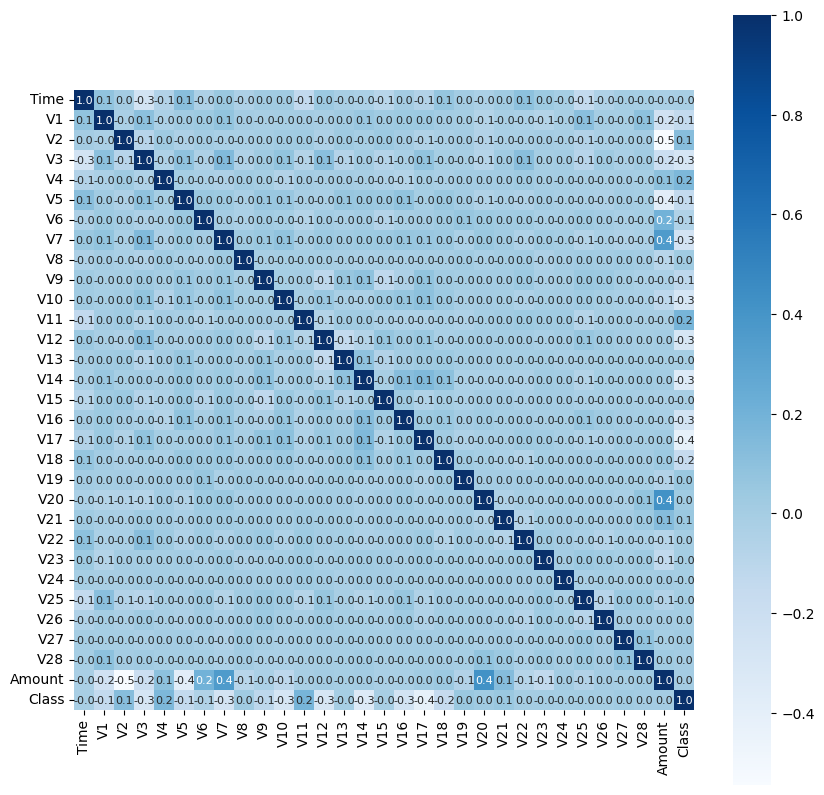

In [ ]:
plt.figure(figsize=(10,10))
correlation=data.corr()
sns.heatmap(correlation , cbar=True , square=True , fmt='.1f' , annot=True , annot_kws={'size':8} , cmap='Blues')

In [ ]:
X=data.drop(columns='Class' , axis=1)
Y=data['Class']


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.2 , random_state=42)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train , Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
X_train_score=accuracy_score(X_train_prediction , Y_train)
print(X_train_score)

0.9987386496384368


In [ ]:
X_test_prediction=model.predict(X_test)
X_test_score=accuracy_score(X_test_prediction , Y_test)
print(X_test_score)

0.9988533425065933


In [ ]:
input_data=(1,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459424895,0.066083685268831,0.717292731410831,-0.165945922763554,2.34586494901581,-2.89008319444231,1.10996937869599,-0.121359313195888,-2.26185709530414,0.524979725224404,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66)
input_data_asaaray=np.asarray(input_data)
input_data_reshaped=input_data_asaaray.reshape(1,-1)

print(input_data_reshaped)

[[ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00  1.77320934e+00
   3.79779593e-01 -5.03198133e-01  1.80049938e+00  7.91460956e-01
   2.47675787e-01 -1.51465432e+00  2.07642865e-01  6.24501459e-01
   6.60836853e-02  7.17292731e-01 -1.65945923e-01  2.34586495e+00
  -2.89008319e+00  1.10996938e+00 -1.21359313e-01 -2.26185710e+00
   5.24979725e-01  2.47998153e-01  7.71679402e-01  9.09412262e-01
  -6.89280956e-01 -3.27641834e-01 -1.39096572e-01 -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]]
